In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric

In [2]:
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (6, 4),
    'font.family': 'STIXgeneral',
    'mathtext.fontset': 'cm',
})

## MWM IPL-3 w/ astroNN

In [3]:
with fits.open('../data/astraAllStarAstroNN-0.5.0.fits.gz') as hdul:
    print(hdul[0].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                                                                                                          Metadata                                                                                                                                                PIPELINE= 'AstroNN '           / Pipeline name                                  V_ASTRA = '0.5.0   '           / Astra version                                  CREATED = '23-11-01 00:01:19'  / File creation time (UTC %y-%m-%d %H:%M:%S)                                                                                             HDU Descriptions                                                                                                

In [4]:
table = Table.read('../data/astraAllStarAstroNN-0.5.0.fits.gz', hdu=3, format='fits')
table

sdss_id,sdss4_apogee_id,gaia_dr2_source_id,gaia_dr3_source_id,tic_v8_id,healpix,carton_0,lead,version_id,catalogid,catalogid21,catalogid25,catalogid31,n_associated,n_neighborhood,sdss5_target_flags,sdss4_apogee_target1_flags,sdss4_apogee_target2_flags,sdss4_apogee2_target1_flags,sdss4_apogee2_target2_flags,sdss4_apogee2_target3_flags,sdss4_apogee_member_flags,sdss4_apogee_extra_target_flags,ra,dec,plx,e_plx,pmra,e_pmra,pmde,e_pmde,gaia_v_rad,gaia_e_v_rad,g_mag,bp_mag,rp_mag,j_mag,e_j_mag,h_mag,e_h_mag,k_mag,e_k_mag,ph_qual,bl_flg,cc_flg,w1_flux,w1_dflux,w2_flux,w2_dflux,w1_frac,w2_frac,w1uflags,w2uflags,w1aflags,w2aflags,mag4_5,d4_5m,rms_f4_5,sqf_4_5,mf4_5,csf,zgr_teff,zgr_e_teff,zgr_logg,zgr_e_logg,zgr_fe_h,zgr_e_fe_h,zgr_e,zgr_e_e,zgr_plx,zgr_e_plx,zgr_teff_confidence,zgr_logg_confidence,zgr_fe_h_confidence,zgr_ln_prior,zgr_chi2,zgr_quality_flags,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,bailer_jones_flags,ebv,e_ebv,ebv_flags,ebv_zhang_2023,e_ebv_zhang_2023,ebv_sfd,e_ebv_sfd,ebv_rjce_glimpse,e_ebv_rjce_glimpse,ebv_rjce_allwise,e_ebv_rjce_allwise,ebv_bayestar_2019,e_ebv_bayestar_2019,ebv_edenhofer_2023,e_ebv_edenhofer_2023,c_star,u_jkc_mag,u_jkc_mag_flag,b_jkc_mag,b_jkc_mag_flag,v_jkc_mag,v_jkc_mag_flag,r_jkc_mag,r_jkc_mag_flag,i_jkc_mag,i_jkc_mag_flag,u_sdss_mag,u_sdss_mag_flag,g_sdss_mag,g_sdss_mag_flag,r_sdss_mag,r_sdss_mag_flag,i_sdss_mag,i_sdss_mag_flag,z_sdss_mag,z_sdss_mag_flag,y_ps1_mag,y_ps1_mag_flag,n_boss_visits,boss_min_mjd,boss_max_mjd,n_apogee_visits,apogee_min_mjd,apogee_max_mjd,source_pk,star_pk,spectrum_pk_id,release,filetype,apred,apstar,obj,telescope,field,prefix,min_mjd,max_mjd,n_entries,n_visits,n_good_visits,n_good_rvs,snr,mean_fiber,std_fiber,spectrum_flags,v_rad,e_v_rad,std_v_rad,median_e_v_rad,doppler_teff,doppler_e_teff,doppler_logg,doppler_e_logg,doppler_fe_h,doppler_e_fe_h,doppler_rchi2,doppler_flags,xcorr_v_rad,xcorr_v_rel,xcorr_e_v_rel,ccfwhm,autofwhm,n_components,task_pk,source_pk_id,v_astra,created,t_elapsed,t_overhead,tag,teff,e_teff,logg,e_logg,c_h,e_c_h,c_1_h,e_c_1_h,n_h,e_n_h,o_h,e_o_h,na_h,e_na_h,mg_h,e_mg_h,al_h,e_al_h,si_h,e_si_h,p_h,e_p_h,s_h,e_s_h,k_h,e_k_h,ca_h,e_ca_h,ti_h,e_ti_h,ti_2_h,e_ti_2_h,v_h,e_v_h,cr_h,e_cr_h,mn_h,e_mn_h,fe_h,e_fe_h,co_h,e_co_h,ni_h,e_ni_h,result_flags
int64,bytes19,int64,int64,int64,int32,bytes1,bytes26,int32,int64,int64,int64,int64,int32,int32,uint8[57],int32,int32,int32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes3,bytes3,bytes3,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,bytes5,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,int32,float32,int32,float32,int32,float32,int32,float32,int32,float32,int32,float32,int32,float32,int32,float32,int32,float32,int32,int32,int32,int32,int32,int32,int32,int64,int64,int64,bytes5,bytes6,bytes4,bytes5,bytes19,bytes6,bytes19,bytes2,int32,int32,int32,int32,int32,int32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,int32,int64,int64,bytes5,bytes26,float32,float32,bytes1,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32
54968703,2M03455109+5955388,474071961785254400,474071961785254400,317571372,13335,--,gaia_d

In [34]:
with fits.open('../data/astraAllStarAstroNN-0.5.0.fits.gz') as hdul:
    print(hdul[3].header)

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1067 / length of dimension 1                          NAXIS2  =              1089927 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                  219 / number of table fields                                                                                                                 Metadata                                                                                                                                                EXTNAME = 'APOGEE/APO'         / Extension name                                 OBSRVTRY= 'APO     '           / Observa

In [17]:
def skycoord_to_galactocentric(ra, dec, distance):
    r"""
    Use astropy's SkyCoord to convert sky coordinates (ra, dec) and distance
    to galactocentric (r, phi, z) coordinates.

    Parameters
    ----------
    ra : array-like
        Right ascension in degrees
    dec : array-like
        Declination in degrees
    distance : array-like
        Distance (from Sun) in kpc

    Returns
    -------
    galr : numpy array
        Galactocentric radius in kpc
    galphi : numpy array
        Galactocentric phi-coordinates in degrees
    galz : numpy arraay
        Galactocentric z-height in kpc
    """
    ra = np.array(ra)
    dec = np.array(dec)
    distance = np.array(distance)
    if ra.shape == dec.shape == distance.shape:
        if not isinstance(ra, u.quantity.Quantity):
            ra *= u.deg
        if not isinstance(dec, u.quantity.Quantity):
            dec *= u.deg
        if not isinstance(distance, u.quantity.Quantity):
            distance *= u.pc
        skycoord = SkyCoord(ra=ra, dec=dec, distance=distance, frame='icrs')
        galactocentric = skycoord.transform_to(frame=Galactocentric())
        galactocentric.representation_type = 'cylindrical'
        galr = galactocentric.rho.to(u.kpc).value
        galphi = galactocentric.phi.to(u.deg).value
        galz = galactocentric.z.to(u.kpc).value
        return galr, galphi, galz
    else:
        raise ValueError('Arrays must be of same length.')

In [18]:
testdata = table[['ra', 'dec', 'r_med_photogeo', 'teff', 'logg', 'fe_h']][:1000]
testdata

ra,dec,r_med_photogeo,teff,logg,fe_h
float32,float32,float32,float32,float32,float32
56.462902,59.92747,3645.456,4792.0215,2.699251,-0.47034132
56.46357,31.997158,4321.012,4929.632,2.6562521,-0.43499213
56.465073,23.431774,--,5874.722,4.3716655,-0.3634321
56.46517,0.6493501,401.97964,5789.8867,4.342682,-0.001123074
56.46553,67.58092,2034.4542,4685.8965,2.9070697,0.123996675
56.465836,67.73073,890.2468,5056.6763,3.3352673,-0.31759533
56.46843,15.528656,469.05844,5673.119,4.0188265,0.0405481
56.469364,22.575022,1215.3965,4263.962,1.969379,0.06929621
56.469563,25.861532,137.58665,3689.9512,4.671039,-0.07107361


In [19]:
galr, galphi, galz = skycoord_to_galactocentric(testdata['ra'], testdata['dec'], testdata['r_med_photogeo'])
testdata['galr'] = galr
testdata['galphi'] = galphi
testdata['galz'] = galz
testdata

ra,dec,r_med_photogeo,teff,logg,fe_h,galr,galphi,galz
float32,float32,float32,float32,float32,float32,float64,float64,float64
56.462902,59.92747,3645.456,4792.0215,2.699251,-0.47034132,11.245873415859746,168.83342033554985,0.28950491135228124
56.46357,31.997158,4321.012,4929.632,2.6562521,-0.43499213,12.087988350850342,173.57869564685285,-1.2868731944823233
56.465073,23.431774,--,5874.722,4.3716655,-0.3634321,nan,nan,nan
56.46517,0.6493501,401.97964,5789.8867,4.342682,-0.001123074,8.429740227388264,-179.75588628711648,-0.23537251393124342
56.46553,67.58092,2034.4542,4685.8965,2.9070697,0.123996675,9.710777236158707,172.13427030099476,0.3821808218912234
56.465836,67.73073,890.2468,5056.6763,3.3352673,-0.31759533,8.795325601944917,176.2033020332747,0.18072387129620981
56.46843,15.528656,469.05844,5673.119,4.0188265,0.0405481,8.526219095409672,179.6668316072903,-0.21213708312698656
56.469364,22.575022,1215.3965,4263.962,1.969379,0.06929621,9.20325169691066,178.5138102788234,-0.4868768382976537
56.469563,25.861532,137.58665,3689.9512,4.671039,-0.07107361,8.245105269607096,179.7726731852988,-0.03130034112740829


In [21]:
testdata = testdata[(testdata['teff'] >= 3500) & (testdata['teff'] < 5500) &
                    (testdata['logg'] >= 1.) & (testdata['logg'] < 3.8)]
testdata

ra,dec,r_med_photogeo,teff,logg,fe_h,galr,galphi,galz
float32,float32,float32,float32,float32,float32,float64,float64,float64
56.462902,59.92747,3645.456,4792.0215,2.699251,-0.47034132,11.245873415859746,168.83342033554985,0.28950491135228124
56.46357,31.997158,4321.012,4929.632,2.6562521,-0.43499213,12.087988350850342,173.57869564685285,-1.2868731944823233
56.46553,67.58092,2034.4542,4685.8965,2.9070697,0.123996675,9.710777236158707,172.13427030099476,0.3821808218912234
56.465836,67.73073,890.2468,5056.6763,3.3352673,-0.31759533,8.795325601944917,176.2033020332747,0.18072387129620981
56.469364,22.575022,1215.3965,4263.962,1.969379,0.06929621,9.20325169691066,178.5138102788234,-0.4868768382976537
56.470306,10.926368,641.6422,4841.94,3.3600278,0.1963086,8.659567792852524,179.80689596861464,-0.32833902118565705
56.470577,69.43145,3715.2957,4759.901,2.6982322,0.0094995275,11.072152261765446,167.10678685474673,0.7726540080491832
56.471016,54.317146,4072.5945,4008.3855,1.074984,-0.48175612,11.739574188284374,169.00761976662963,0.007154547469249159
56.47222,49.761974,4092.5457,4913.1577,2.4478416,-0.5802509,11.82271598503017,169.89243557051475,-0.24912468296869128


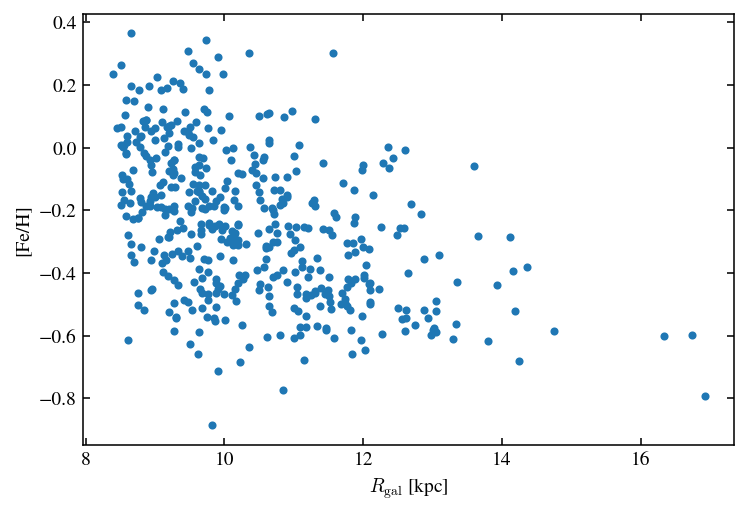

In [24]:
fig, ax = plt.subplots()
ax.scatter(testdata['galr'], testdata['fe_h'], s=10)
ax.set_xlabel(r'$R_{\rm gal}$ [kpc]')
ax.set_ylabel('[Fe/H]')
plt.show()

## APOGEE DR17 w/ astroNN

In [44]:
def decode(df):
    """
    Decode DataFrame with byte strings into ordinary strings.

    Parameters
    ----------
    df : pandas DataFrame
    """
    str_df = df.select_dtypes([object])
    str_df = str_df.stack().str.decode('utf-8').unstack()
    for col in str_df:
        df[col] = str_df[col]
    return df

In [54]:
aspcap_table = Table.read('../data/allStarLite-dr17-synspec_rev1.fits', hdu=1)
colnames = [name for name in aspcap_table.colnames if len(aspcap_table[name].shape) <= 1]
aspcap_df = aspcap_table[colnames].to_pandas()
aspcap_df.columns = [c.lower() for c in aspcap_df.columns.tolist()]
astroNN_df = Table.read('../data/apogee_astroNN-DR17.fits').to_pandas()
astroNN_df.columns = [c.lower() for c in astroNN_df.columns.tolist()]
dr17data = decode(aspcap_df).join(astroNN_df, rsuffix='_astroNN')
dr17data

,apogee_id,telescope,field,alt_id,ra,dec,glon,glat,j,j_err,...,theta_phi,theta_phi_err,theta_z,theta_z_err,rl,rl_err,energy,energy_err,eminusec,eminusec_err
0,VESTA,apo1m,calibration,,NaN,NaN,292.219131,-30.602919,99.999001,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2M00000002+7417074,apo25m,120+12,none,0.000103,74.285408,119.401807,11.767414,8.597000,0.039,...,0.162341,0.002044,1.257675,0.029077,9.313814,0.104881,-35566.630438,541.664052,-53127.445881,237.718629
2,2M00000019-1924498,apo25m,060-75,none,0.000832,-19.413851,63.394122,-75.906397,11.074000,0.022,...,6.186121,0.014669,3.736751,0.015291,7.512346,0.151292,-44554.547150,644.013746,-56067.037371,67.716759
3,2M00000032+5737103,apo25m,116-04,none,0.001335,57.619530,116.065371,-4.564768,10.905000,0.023,...,0.107626,0.000209,4.070717,0.015488,8.936393,0.004623,-38054.696452,22.626826,-54490.702876,8.455816
4,2M00000032+5737103,apo25m,N7789,none,0.001335,57.619530,116.065371,-4.564768,10.905000,0.023,...,0.107335,0.000205,4.069535,0.015443,8.940202,0.004568,-38034.879007,22.339314,-54482.585262,8.342593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733896,2M23595886-2009435,apo25m,060-75,none,359.995258,-20.162107,60.806239,-76.324013,11.788000,0.022,...,5.245957,0.035109,4.489594,0.019772,2.715510,0.173466,-26309.039393,1459.584798,-3208.330021,3927.172429
733897,2M23595886+5726058,apo25m,116-04,none,359.995265,57.434956,116.025359,-4.745011,11.466000,0.024,...,0.241518,0.001445,3.770612,0.034564,8.343132,0.059089,-40588.051794,297.780679,-55113.572201,98.472122
733898,2M23595921+5609479,apo25m,NGC7789_MGA,none,359.996744,56.163330,115.771964,-5.991363,11.985000,0.023,...,0.255623,0.002026,5.967744,0.008252,9.237442,0.083535,-36290.481852,387.265723,-53629.147394,141.979567
733899,2M23595949-7342592,lco25m,SMC12,none,359.997887,-73.716454,307.821174,-42.919934,15.924000,0.094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
print(dr17data.columns.tolist())

['apogee_id', 'telescope', 'field', 'alt_id', 'ra', 'dec', 'glon', 'glat', 'j', 'j_err', 'h', 'h_err', 'k', 'k_err', 'ak_targ', 'ak_targ_method', 'ak_wise', 'sfd_ebv', 'apogee_target1', 'apogee_target2', 'apogee2_target1', 'apogee2_target2', 'apogee2_target3', 'apogee2_target4', 'targflags', 'survey', 'programname', 'nvisits', 'snr', 'snrev', 'starflag', 'starflags', 'andflag', 'andflags', 'vhelio_avg', 'vscatter', 'verr', 'rv_teff', 'rv_logg', 'rv_feh', 'rv_alpha', 'rv_carb', 'rv_chi2', 'rv_ccfwhm', 'rv_autofwhm', 'rv_flag', 'n_components', 'meanfib', 'sigfib', 'min_h', 'max_h', 'min_jk', 'max_jk', 'gaiaedr3_source_id', 'gaiaedr3_parallax', 'gaiaedr3_parallax_error', 'gaiaedr3_pmra', 'gaiaedr3_pmra_error', 'gaiaedr3_pmdec', 'gaiaedr3_pmdec_error', 'gaiaedr3_phot_g_mean_mag', 'gaiaedr3_phot_bp_mean_mag', 'gaiaedr3_phot_rp_mean_mag', 'gaiaedr3_dr2_radial_velocity', 'gaiaedr3_dr2_radial_velocity_error', 'gaiaedr3_r_med_geo', 'gaiaedr3_r_lo_geo', 'gaiaedr3_r_hi_geo', 'gaiaedr3_r_med_photo

In [59]:
fatal_flags = (2**23) # STAR_BAD
sample = dr17data[(dr17data['logg_err_astroNN'] <= 0.2) &
                  (dr17data['extratarg'] == 0) &
                  (dr17data['aspcapflag'] & fatal_flags == 0) &
                  (dr17data['snrev'] >= 80)].copy()
sample.replace(99.999, np.nan, inplace=True)
sample

,apogee_id,telescope,field,alt_id,ra,dec,glon,glat,j,j_err,...,theta_phi,theta_phi_err,theta_z,theta_z_err,rl,rl_err,energy,energy_err,eminusec,eminusec_err
1,2M00000002+7417074,apo25m,120+12,none,0.000103,74.285408,119.401807,11.767414,8.597,0.039,...,0.162341,0.002044,1.257675,0.029077,9.313814,0.104881,-35566.630438,541.664052,-53127.445881,237.718629
4,2M00000032+5737103,apo25m,N7789,none,0.001335,57.619530,116.065371,-4.564768,10.905,0.023,...,0.107335,0.000205,4.069535,0.015443,8.940202,0.004568,-38034.879007,22.339314,-54482.585262,8.342593
6,2M00000068+5710233,apo25m,N7789,none,0.002850,57.173164,115.977154,-5.002392,10.664,0.023,...,0.032738,0.000668,3.138519,0.001919,8.764414,0.001737,-38213.703934,24.443209,-54114.309690,23.063548
7,2M00000103+1525513,apo25m,107-46_MGA,none,0.004322,15.430942,105.065440,-45.649348,11.278,0.023,...,0.136570,0.000645,5.076972,0.007074,8.654332,0.002445,-39014.934925,11.398627,-54565.263278,4.281402
8,2M00000133+5721163,apo25m,NGC7789_btx,none,0.005558,57.354549,116.014776,-4.824917,13.261,0.029,...,0.449614,0.003607,5.937608,0.013181,10.125475,0.199895,-31648.946189,749.973307,-51429.303480,233.761741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733883,2M23595553+6339020,apo25m,117+01,none,359.981416,63.650566,117.253198,1.348353,12.551,0.027,...,0.469107,0.008016,2.086154,0.069904,11.543448,0.291995,-26807.124844,1113.507577,-49930.146020,484.014102
733890,2M23595669+6131251,apo25m,116+00,none,359.986225,61.523659,116.833497,-0.736743,11.698,0.026,...,0.072586,0.001521,5.815742,0.025843,10.132192,0.066956,-32175.391700,333.813770,-51979.403603,160.897798
733893,2M23595837+5700444,apo25m,N7789,none,359.993224,57.012356,115.939899,-5.158948,12.657,0.026,...,0.410192,0.008440,5.703911,0.036052,9.992247,0.243965,-33088.530298,999.150630,-52517.214854,356.191457
733897,2M23595886+5726058,apo25m,116-04,none,359.995265,57.434956,116.025359,-4.745011,11.466,0.024,...,0.241518,0.001445,3.770612,0.034564,8.343132,0.059089,-40588.051794,297.780679,-55113.572201,98.472122


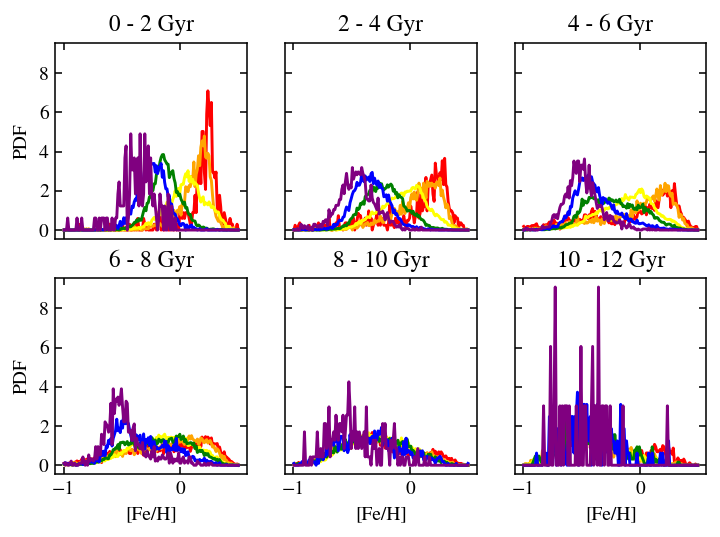

In [69]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

mdf_bins = np.arange(-1., 0.51, 0.01)
mdf_bin_centers = (mdf_bins[1:] + mdf_bins[:-1]) / 2

age_bins = [0, 2, 4, 6, 8, 10, 12]
for j, ax in enumerate(axs.flatten()):
    age_lim = (age_bins[j], age_bins[j+1])
    galr_bins = [3, 5, 7, 9, 11, 13, 15]
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    for i in range(len(galr_bins)-1):
        galr_lim = (galr_bins[i], galr_bins[i+1])
        subset = sample[(sample['galr'] >= galr_lim[0]) &
                        (sample['galr'] < galr_lim[1]) &
                        (sample['age_lowess_correct'] >= age_lim[0]) &
                        (sample['age_lowess_correct'] < age_lim[1])]
        mdf, bin_edges = np.histogram(subset['fe_h_astroNN'], bins=mdf_bins, density=True)
        ax.plot(mdf_bin_centers, mdf, label=galr_lim, color=colors[i])
        ax.set_title('%s - %s Gyr' % age_lim)

# fig.legend()
for ax in axs[1]:
    ax.set_xlabel('[Fe/H]')
for ax in axs[:,0]:
    ax.set_ylabel('PDF')

plt.show()

-0.07657142857142865 0.5708095238095254


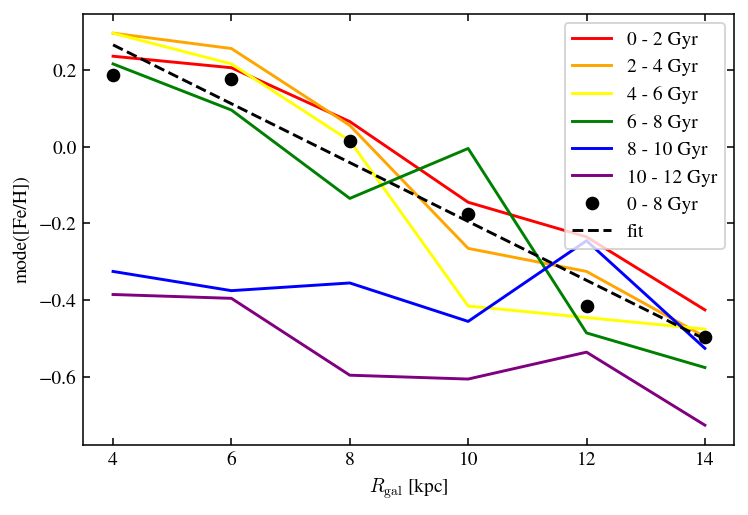

In [80]:
fig, ax = plt.subplots()

mdf_bins = np.arange(-1., 0.51, 0.01)
mdf_bin_centers = (mdf_bins[1:] + mdf_bins[:-1]) / 2

age_bins = np.arange(0, 14, 2)
age_bin_centers = (age_bins[1:] + age_bins[:-1]) / 2
galr_bins = np.arange(3, 17, 2)
galr_bin_centers = (galr_bins[1:] + galr_bins[:-1]) / 2
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for j in range(len(age_bins) - 1):
    age_lim = (age_bins[j], age_bins[j+1])
    modes = []
    for i in range(len(galr_bins)-1):
        galr_lim = (galr_bins[i], galr_bins[i+1])
        subset = sample[(sample['galr'] >= galr_lim[0]) &
                        (sample['galr'] < galr_lim[1]) &
                        (sample['age_lowess_correct'] >= age_lim[0]) &
                        (sample['age_lowess_correct'] < age_lim[1])]
        mdf, bin_edges = np.histogram(subset['fe_h_astroNN'], bins=mdf_bins, density=True)
        # calculate the mode
        modes.append(mdf_bin_centers[np.argmax(mdf)])
    ax.plot(galr_bin_centers, modes, color=colors[j], label='%s - %s Gyr' % age_lim)

# Best fit for <8 Gyr stars
age_lim = (0, 8)
modes = []
for i in range(len(galr_bins)-1):
    galr_lim = (galr_bins[i], galr_bins[i+1])
    subset = sample[(sample['galr'] >= galr_lim[0]) &
                    (sample['galr'] < galr_lim[1]) &
                    (sample['age_lowess_correct'] >= age_lim[0]) &
                    (sample['age_lowess_correct'] < age_lim[1])]
    mdf, bin_edges = np.histogram(subset['fe_h_astroNN'], bins=mdf_bins, density=True)
    # calculate the mode
    modes.append(mdf_bin_centers[np.argmax(mdf)])
A = np.vstack([galr_bin_centers, np.ones(len(galr_bin_centers))]).T
m, c = np.linalg.lstsq(A, np.array(modes), rcond=None)[0]
print(m, c)
ax.plot(galr_bin_centers, modes, 'ko', label='%s - %s Gyr' % age_lim)
ax.plot(galr_bin_centers, m * galr_bin_centers + c, 'k--', label='fit')

ax.set_xlabel(r'$R_{\rm gal}$ [kpc]')
ax.set_ylabel('mode([Fe/H])')
ax.legend()

plt.show()

In [81]:
def predict_birth_radius(feh, slope=-0.077, intercept=0.571):
    return (feh - intercept) / slope

predict_birth_radius(0.)

7.415584415584415

In [83]:
young_sample = sample[sample['age_lowess_correct'] <= 8.].copy()
slope = -0.077
intercept = 0.571
young_sample['galr_birth_pred'] = (young_sample['fe_h'] - intercept) / slope